# No Cloning Theorem

## Statement
Given an unknown quantum state, one can not copy that qubit's state to another qubit, without destroying the original qubit.


## What if the state to be copied is known?
If we know the state, then we can apply the appropriate quantum gates, to obtain the state to be copied in the target qubit.

In [ ]:
#!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 

In [ ]:
#!pip install 'qiskit[visualization]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=7e9c47b1440611bde8c3d7de326eeab15eaae2eb297659617d8b73c408a02a65
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [ ]:
from qiskit.visualization.state_visualization import plot_bloch_multivector
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector,plot_state_city
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import circuit_drawer

In [ ]:
#Initialise circuit
simulator = QasmSimulator()
circuit = QuantumCircuit(2, 2)

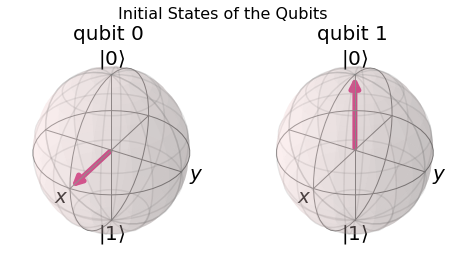

In [ ]:
#Initialise the values of the original qubits
qubit_to_copy = Statevector.from_label('+')
qubit_target = Statevector.from_label('0')

#circuit.initialize([qubit_target,qubit_to_copy], [1,0])
circuit.initialize(qubit_to_copy, 0)
circuit.initialize(qubit_target, 1)

state = Statevector(circuit)
plot_bloch_multivector(state,title='Initial States of the Qubits')

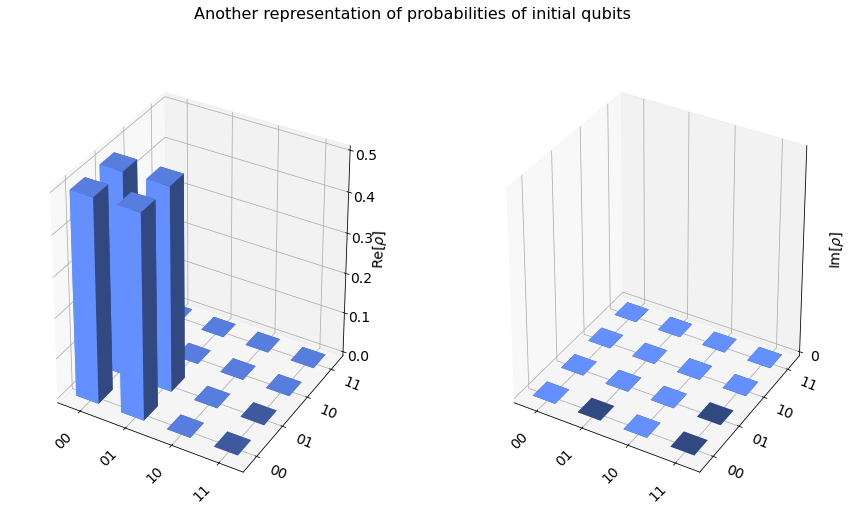

In [ ]:
#Another visualisation
plot_state_city(state,
                title='Another representation of probabilities of initial qubits',
                figsize=(15,8)
                )

In [ ]:
#Add gates
circuit.i(0)
circuit.x(1)

In [ ]:
#Add measurements
circuit.measure([0,1],[0,1])

In [ ]:
#Compile the results
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

In [ ]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("The counts of the measurements are: ",counts)

The counts of the measurements are:  {'10': 521, '11': 479}


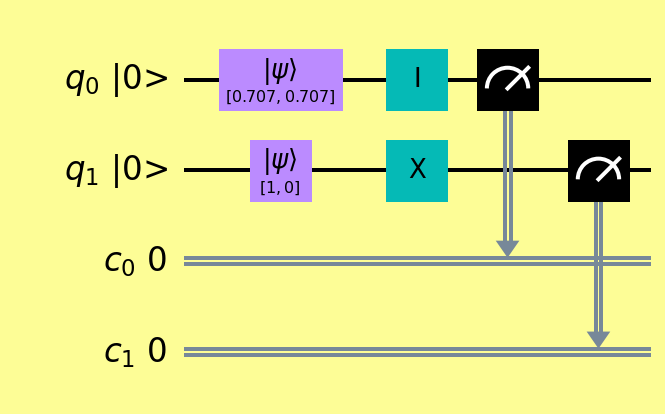

In [ ]:
# Draw the circuit
circuit_drawer(circuit,
               output='mpl',
               style={'backgroundcolor': '#fdfd96'},
               scale=2,
               #justify='none',
               idle_wires=False,
               initial_state=True,
               cregbundle=False
               )

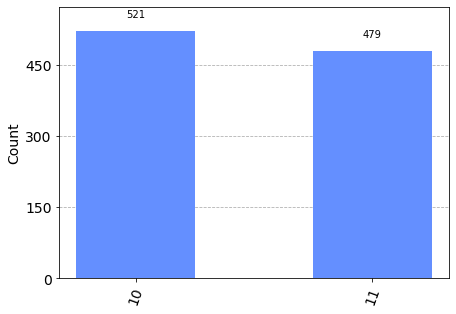

In [ ]:
plot_histogram(counts)

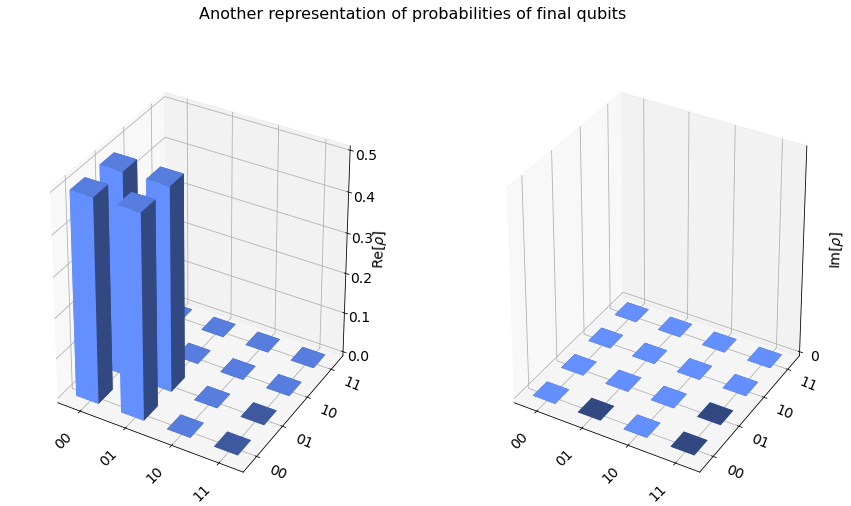

In [ ]:
plot_state_city(state,
                title='Another representation of probabilities of final qubits',
                figsize=(15,8)
                )

##What is the state to be copied is unknown?
In that case, by the law of conservation of quantum information, it is impossible to copy or duplicate quantum information. This is because, to copy the qubit, we must observe it. Upon observation, the qubit's superposition collapses and we lose out all the data it had contained. We can't obtain respective amplitudes of |0> and |1> either, because the amplitude can be rational, or irrational, which is impossible to store classically with a finite amount of memory.

Since it is impossible to create such a quantum gate that performs a linear transformation of a vector into a quadratic vector, we can not make a quantum circuit that is performing a cloning operation.

In theory, we could clone those states that are orthogonal to each other. However, we in order to that, we must know for a fact that both of them are orthogonal to each other. To know that fact, we must look at the qubit, and when we do, we make the superposition collapse.